<a href="https://colab.research.google.com/github/tharindatj/HandsOnMachinerLearning/blob/master/chapter2_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing liabraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [107]:
housing = pd.read_csv('housing.csv')

Data exploration

In [108]:
#to get all the data displayed
pd.set_option('display.max_columns', None)

In [109]:
print(housing.head())
print(housing.columns)
print(housing.describe())
print(housing.info())
print(housing.shape)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      

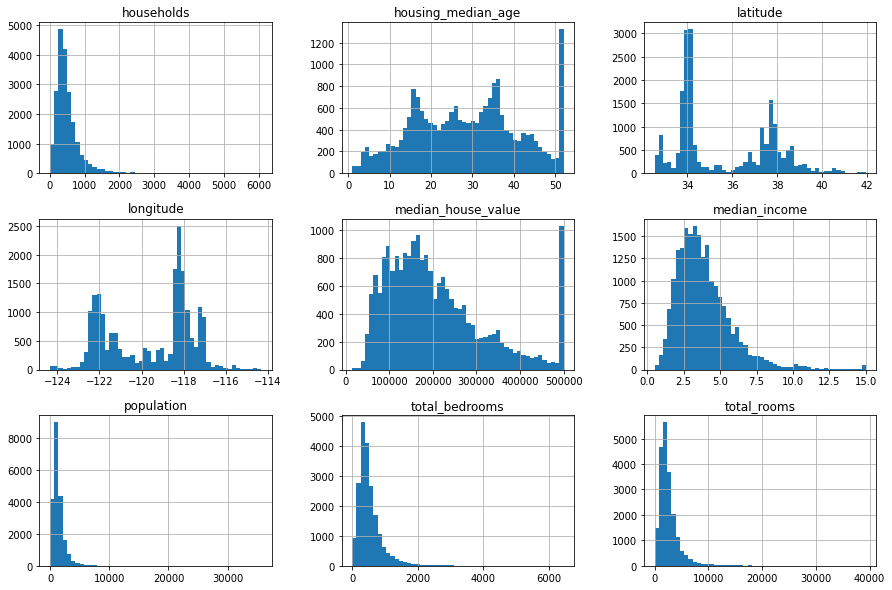

In [110]:
housing.hist(bins=50, figsize=(15,10))
plt.show()

Training  test set split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4eb9acc88>]],
      dtype=object)

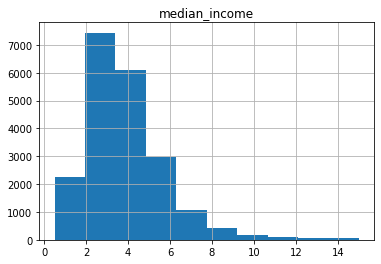

In [111]:
#median income is a key determinant of housing value
#hence train set and test set should reflect the strata and distribution of the median income
housing.hist(column='median_income')

In [112]:
#creating income category columns
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])
housing['income_cat'].value_counts()/housing['income_cat'].count()

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [113]:
#splitting test and training set based an stratas
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [114]:
a = strat_train_set['income_cat'].value_counts()/strat_train_set['income_cat'].count()
b = strat_test_set['income_cat'].value_counts()/strat_test_set['income_cat'].count()
c = housing['income_cat'].value_counts()/housing['income_cat'].count()
comparison = pd.DataFrame({'Train Set':a, 'Test Set':b, 'Full Set':c})
comparison

,Train Set,Test Set,Full Set
3,0.350594,0.350533,0.350581
2,0.318859,0.318798,0.318847
4,0.176296,0.176357,0.176308
5,0.114402,0.114583,0.114438
1,0.039850,0.039729,0.039826


In [115]:
for dfs in (strat_train_set, strat_test_set):
  dfs.drop('income_cat', axis=1, inplace=True)

In [116]:
housing = strat_train_set.copy()

Data Evaluation

In [117]:
#getting columns with missing data and identyfying columns with categorical data
missing_data_col = [col for col in housing.columns if housing[col].isnull().any()]
cat_data_col = [col for col in housing.columns if housing[col].dtype=='object']
print(f'Columns with missing data {missing_data_col},\ncolumns with catagorical data {cat_data_col}')

Columns with missing data ['total_bedrooms'],
columns with catagorical data ['ocean_proximity']


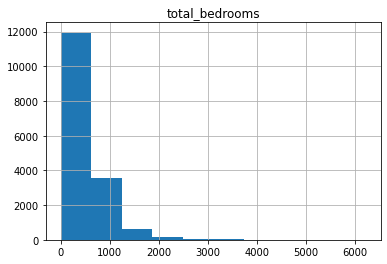

mean =  total_bedrooms    534.97389
dtype: float64
median =  total_bedrooms    433.0
dtype: float64
mode =     total_bedrooms
0           272.0
1           280.0


In [118]:
#missing data distribution
housing.hist(column=missing_data_col)
plt.show()
print('mean = ', housing[missing_data_col].mean())
print('median = ', housing[missing_data_col].median())
print('mode = ', housing[missing_data_col].mode())

In [119]:
#categorical data
housing['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [120]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [121]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

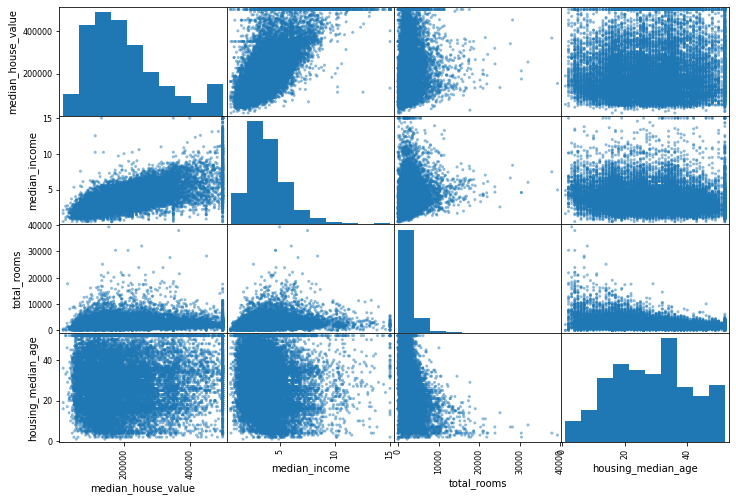

In [122]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8), diagonal='hist')
plt.show()


Feature Additions Check

In [123]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [184]:
housing["bed_rooms_per_room"] = housing['total_bedrooms'] / housing['total_rooms']
housing['room_per_houshold'] = housing['total_rooms'] / housing['households']
housing['population_per_houshold'] = housing['population'] / housing['households']
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_rooms_per_room,room_per_houshold,population_per_houshold
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,0.223852,4.625369,2.094395
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,<1H OCEAN,0.159057,6.008850,2.707965
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,NEAR OCEAN,0.241291,4.225108,2.025974
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,INLAND,0.200866,5.232295,4.135977
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,<1H OCEAN,0.231341,4.505810,3.047847


In [125]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687160
room_per_houshold          0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
population_per_houshold   -0.021985
population                -0.026920
longitude                 -0.047432
latitude                  -0.142724
bed_rooms_per_room        -0.259984
Name: median_house_value, dtype: float64

In [189]:
housing.shape

(16512, 12)

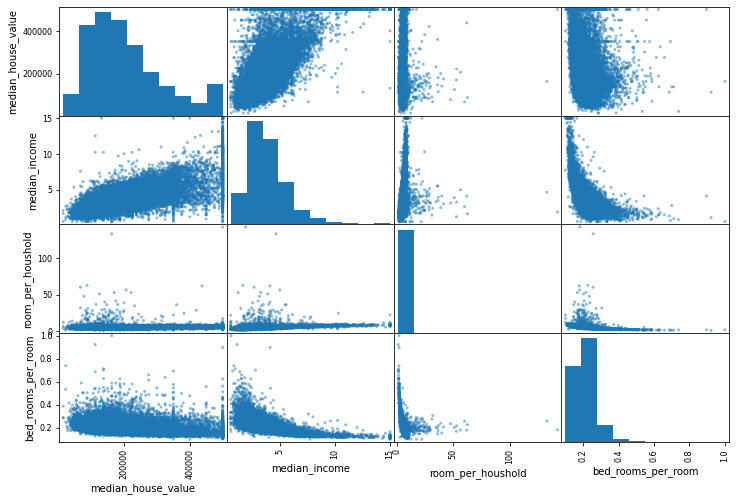

In [127]:
feature_attributes = ['median_house_value','median_income','room_per_houshold','bed_rooms_per_room' ]
scatter_matrix(housing[feature_attributes], figsize=(12,8))
plt.show()

Resetting data set and spliting features and label

In [128]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

Data Cleaning, Standardization and Custom Attribute Pipeline


In [129]:
#importing the libararies
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [130]:
#seperating the numerical columns from the categorical columns
housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing['ocean_proximity']

In [131]:
#custom transformer for new features

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

from sklearn.base import BaseEstimator, TransformerMixin
new_feature=[]

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_rooms_per_household=True, add_population_per_household=True, add_bedrooms_per_room=True):
    self.add_rooms_per_household = add_rooms_per_household
    self.add_population_per_household = add_population_per_household
    self.add_bedrooms_per_room = add_bedrooms_per_room
    # self.new_feature = new_feature
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    self.new_feature=[]
    if self.add_rooms_per_household is True and self.add_population_per_household is False and self.add_bedrooms_per_room is False:
      new_feature.append('rooms per houshold')
      return np.c_[X, rooms_per_household]
    elif self.add_rooms_per_household is True and self.add_population_per_household is True and self.add_bedrooms_per_room is False:
      new_feature.extend(('rooms per houshold','population_per_household'))
      return np.c_[X, rooms_per_household, population_per_household]
    elif self.add_rooms_per_household is False and self.add_population_per_household is False and self.add_bedrooms_per_room is False:
      return X
    else:
      new_feature.extend(('rooms per houshold','population_per_household','bedrooms_per_room'))
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

In [132]:
new_feature

[]

In [133]:
#creating numerical pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('attrib_adder', CombinedAttributeAdder()),
                        ('stc_scaler', StandardScaler())
                        ])

#column names
num_attribs = list(housing_num)
cat_attribs =['ocean_proximity']

#full pipeline
full_pipeline=ColumnTransformer([('num', num_pipeline, num_attribs),
                ('cat', OneHotEncoder(), cat_attribs),
                ])

In [134]:
#final preparation of the data
housing_prepared = full_pipeline.fit_transform(housing)

[('num', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0)),
                  ('attrib_adder',
                   CombinedAttributeAdder(add_bedrooms_per_room=True,
                                          add_population_per_household=True,
                                          add_rooms_per_household=True)),
                  ('stc_scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True))],
           verbose=False), ['longitude',
   'latitude',
   'housing_median_age',
   'total_rooms',
   'total_bedrooms',
   'population',
   'households',
   'median_income']),
 ('cat',
  OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['ocean_proximity'])]

In [183]:
housing["bed_rooms_per_room"] = housing['total_bedrooms'] / housing['total_rooms']
housing["bed_rooms_per_room"][0]

0.14659090909090908

In [191]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'bed_rooms_per_room', 'room_per_houshold',
       'population_per_houshold'],
      dtype='object')

Training and Evaluating the Models

In [135]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error

In [136]:
#getting summarised cross validation scores
def crossvalscore(score, prediction):
  print('Scores: ', score)
  print('Mean: ' , score.mean())
  print('Standard Dev: ', score.std())
  print('RMSE on full training set       : ', np.sqrt(mean_squared_error(housing_labels, prediction)))

*Linear Regression Model*

In [137]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [138]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
#predicting on the full training set
lin_reg_predictions = lin_reg.predict(housing_prepared)

In [140]:
score_lin = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
score_lin_rmse = np.sqrt(-score_lin)

In [141]:
crossvalscore(score_lin_rmse, lin_reg_predictions)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Dev:  2731.674001798344
RMSE on full training set       :  68628.19819848923


*Decision Tree Regressor*

In [142]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

In [143]:
dt_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [144]:
#prediction on full training set
dt_reg_prediction = dt_reg.predict(housing_prepared)

In [145]:
#cross val scores
score_dt = cross_val_score(dt_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
score_dt_rmse = np.sqrt(-score_dt)

In [146]:
crossvalscore(score_dt_rmse, dt_reg_prediction)

Scores:  [68847.57064835 67284.6529911  71643.61167981 68191.14159333
 71769.67000711 74414.11180291 69943.57880831 70731.51357524
 77299.06519326 70168.75270294]
Mean:  71029.36690023386
Standard Dev:  2837.92017682252
RMSE on full training set       :  0.0


*Random Forest Regression*

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [148]:
rf_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [149]:
#predicting on the full training set
rf_reg_predictions = rf_reg.predict(housing_prepared)

In [150]:
score_rf = cross_val_score(rf_reg, housing_prepared, housing_labels, cv=10,
                           scoring='neg_mean_squared_error')
score_rf_rmse = np.sqrt(-score_rf)

In [151]:
crossvalscore(score_rf_rmse, rf_reg_predictions)

Scores:  [49458.5233098  47483.45240726 50038.23998333 52291.77400318
 49830.81803379 53358.68320275 48964.96214924 47524.29651924
 52906.31441361 49966.61161665]
Mean:  50182.36756388495
Standard Dev:  1962.2661545546036
RMSE on full training set       :  18663.13519806763


*Support Vector Machine Regressor*

In [152]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')

In [153]:
#standardizing the labesl for SVR model
sc_labels = StandardScaler()
housing_labels_stdized = housing_labels.values
housing_labels_stdized = housing_labels_stdized.reshape(len(housing_labels_stdized),1)
housing_labels_stdized = sc_labels.fit_transform(housing_labels_stdized)

In [154]:
svr_reg.fit(housing_prepared, housing_labels_stdized)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [155]:
#predicting on the full training set
svr_reg_predictions = svr_reg.predict(housing_prepared)

In [156]:
svr_reg_predictions = sc_labels.inverse_transform(svr_reg_predictions)

In [157]:
svr_reg_predictions

array([206181.41441921, 311084.13936806, 190297.35454234, ...,
       107279.42297085, 172466.11422999, 341992.43530726])

In [158]:
svr_reg_cross_val_predictions = cross_val_predict(svr_reg, housing_prepared, housing_labels_stdized, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [159]:
svr_reg_cross_val_predictions_reversed = sc_labels.inverse_transform(svr_reg_cross_val_predictions)

In [160]:
svr_reg_cross_val_predictions_reversed 

array([201984.47502362, 313982.12539835, 192530.5666709 , ...,
       106593.8175111 , 172149.42607965, 339646.73602948])

In [161]:
from sklearn.metrics import mean_squared_error
svr_rmse_full_set = np.sqrt(mean_squared_error(housing_labels, sc_labels.inverse_transform(svr_reg.predict(housing_prepared))))
svr_rmse_cross_val_predict = np.sqrt(mean_squared_error(housing_labels, svr_reg_cross_val_predictions_reversed))

In [162]:
print(f'SVR RMSE Full Set : {svr_rmse_full_set} | SVR_RMSE_Cross_Val: {svr_rmse_cross_val_predict}')

SVR RMSE Full Set : 54819.48869069631 | SVR_RMSE_Cross_Val: 56684.78351740382


Mode fine tuninig:
*Selected model - RandomForest*

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid =  [{'n_estimators':[3,10,30], 'max_features': [7, 8, 9, 10]}]
grid_search = GridSearchCV(rf_reg, param_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

In [165]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [166]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 30}

In [167]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

58702.05913560649 {'max_features': 7, 'n_estimators': 3}
52049.83912724864 {'max_features': 7, 'n_estimators': 10}
49856.149415543514 {'max_features': 7, 'n_estimators': 30}
58218.18066370252 {'max_features': 8, 'n_estimators': 3}
51848.65685831571 {'max_features': 8, 'n_estimators': 10}
50148.60058623629 {'max_features': 8, 'n_estimators': 30}
58263.049925135354 {'max_features': 9, 'n_estimators': 3}
52104.850743007504 {'max_features': 9, 'n_estimators': 10}
50215.49722880771 {'max_features': 9, 'n_estimators': 30}
58972.16631514829 {'max_features': 10, 'n_estimators': 3}
52164.33523777723 {'max_features': 10, 'n_estimators': 10}
50092.518884896315 {'max_features': 10, 'n_estimators': 30}


In [168]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [169]:
cat_encoder = full_pipeline.named_transformers_['cat']
ehot_attribs = list(cat_encoder.categories_[0])

In [193]:
tot_attribs = num_attribs + new_feature + cat_onehot_attribs
len(tot_attribs)

16

In [198]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.20178857e-02, 6.40540094e-02, 4.52078132e-02, 1.60709633e-02,
       1.53248580e-02, 1.61377870e-02, 1.51499959e-02, 3.00754619e-01,
       6.21196357e-02, 1.13950687e-01, 1.02598877e-01, 1.20213816e-02,
       1.56973914e-01, 9.79006673e-05, 2.95194118e-03, 4.56773084e-03])

In [172]:
sorted(zip(feature_importance,tot_attribs), reverse=True)

[(0.30075461895205036, 'median_income'),
 (0.1569739143840336, 'INLAND'),
 (0.11395068692375906, 'population_per_household'),
 (0.10259887726452648, 'bedrooms_per_room'),
 (0.07201788570358701, 'longitude'),
 (0.06405400939009101, 'latitude'),
 (0.06211963569095204, 'rooms per houshold'),
 (0.04520781321529993, 'housing_median_age'),
 (0.016137786988666265, 'population'),
 (0.016070963304514213, 'total_rooms'),
 (0.01532485797924288, 'total_bedrooms'),
 (0.015149995892579978, 'households'),
 (0.012021381623516241, '<1H OCEAN'),
 (0.004567730837292616, 'NEAR OCEAN'),
 (0.002951941182579345, 'NEAR BAY'),
 (9.790066730901312e-05, 'ISLAND')]

In [173]:
from sklearn.model_selection import RandomizedSearchCV

['rooms per houshold', 'population_per_household', 'bedrooms_per_room']

In [173]:
param_grid_random =  [{'n_estimators':[3,10,30], 'max_features': [7, 8, 9, 10]}]